# 2D Gaussian

In this notebook, you'll recover mean and covariance matrix of a 2D Gaussian. You'll then use these values to draw a visual representation, exploring how changing the mean and covariance values alters the distribution.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import numpy.linalg as LA
from matplotlib.patches import Ellipse

%matplotlib inline

In [2]:
def create_ellipse(mu, angle, width, height):
    # angle is plotted such that it starts from 180 and goes
    # clockwise instead of from 0 degrees and goes counter-clockwise
    # so 135 degrees -> 45 degrees
    return Ellipse(xy=mu, width=2*width, height=2*height, angle=angle,
                      facecolor='none', edgecolor='k', linewidth=3.5)

def plot_ellipse(mu, sigma):  
    (w, v) = LA.eig(sigma)
    angle = np.degrees(np.arctan2(v[1, 0], v[0, 0]))
    
    ax = plt.gca()
    ellipse = create_ellipse(mu, angle, w[0], w[1])
    ax.add_patch(ellipse)
    plt.plot(mu[0], mu[1], 'ro')

In [3]:
plt.rcParams['figure.figsize'] = 12, 12

The generated samples are in a `.txt` file.

In [4]:
samples = np.loadtxt('data.txt')

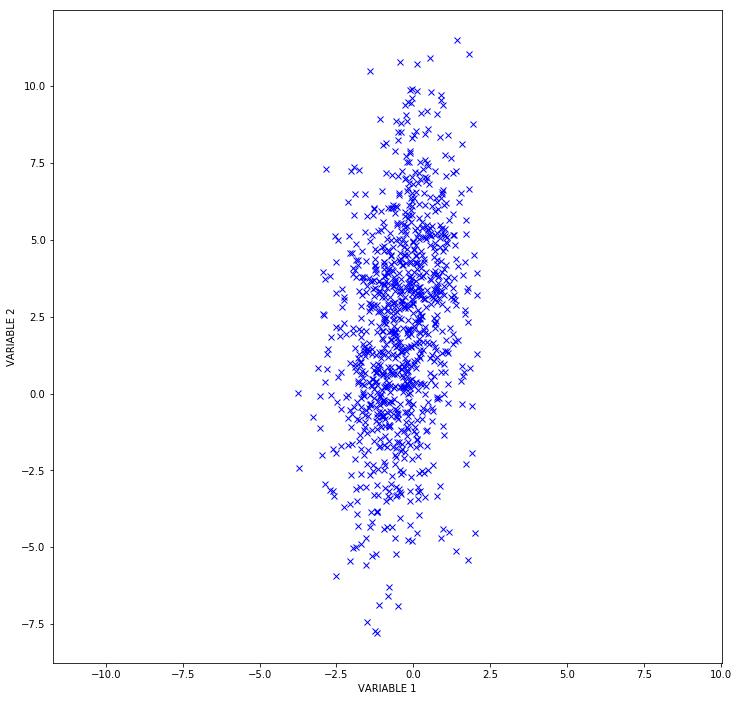

In [5]:
# only plot 1000 samples, otherwise the plot gets cluttered
plt.plot(samples[:1000, 0], samples[:1000, 1], 'bx')
plt.axis('equal')
plt.xlabel('VARIABLE 1')
plt.ylabel('VARIABLE 2')
plt.show()

In [24]:
N = samples.shape[0]
# TODO: calculate the mean of the samples
# HINT: 2-element array
mean = np.mean(samples, axis=0)
print("Mean =\n", mean)

# TODO: calculate the covariance matrix of the samples. You can do this however you like. 
# HINT: 2x2 matrix
print(samples.shape)
C = np.zeros((2, 2))
for i in range(N):
    error = samples[i,:] - mean
    C += np.outer(error, error) / N
# Alt - C = np.cov(samples.T)
print("Covariance =\n", C)

Mean =
 [-0.49030358  2.01127981]
(10000, 2)
Covariance =
 [[  1.00234135   1.02563106]
 [  1.02563106  10.54346   ]]


Plot an ellipse which acts as a visual representation of the mean and covariance. Mean is represented by the red dot and the samples are the blue dots.

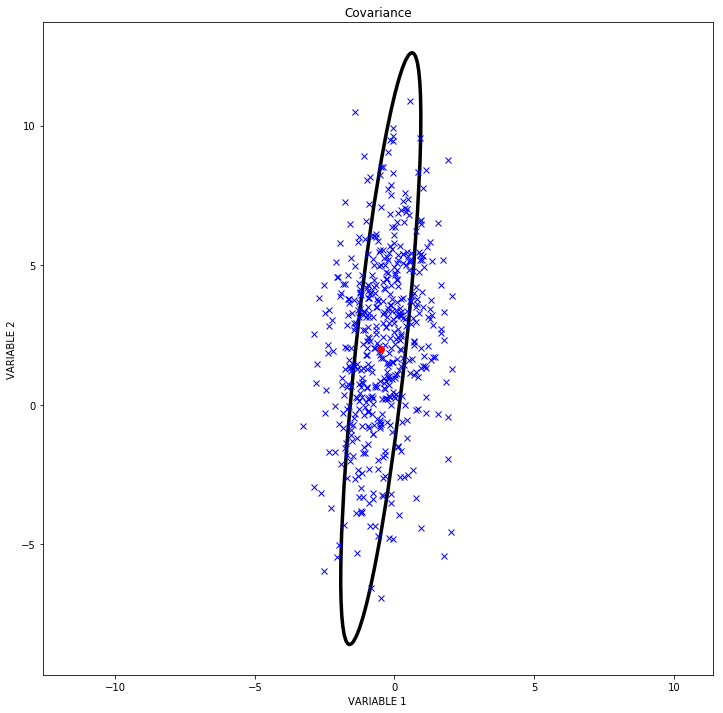

In [15]:
plt.title('Covariance')
plt.axis('equal')
plt.xlabel('VARIABLE 1')
plt.ylabel('VARIABLE 2')

plt.plot(samples[:500, 0], samples[:500, 1], 'bx')
plot_ellipse(mean, C)

Fiddle with the diagonal values to get a better feel how it influences the distribution.

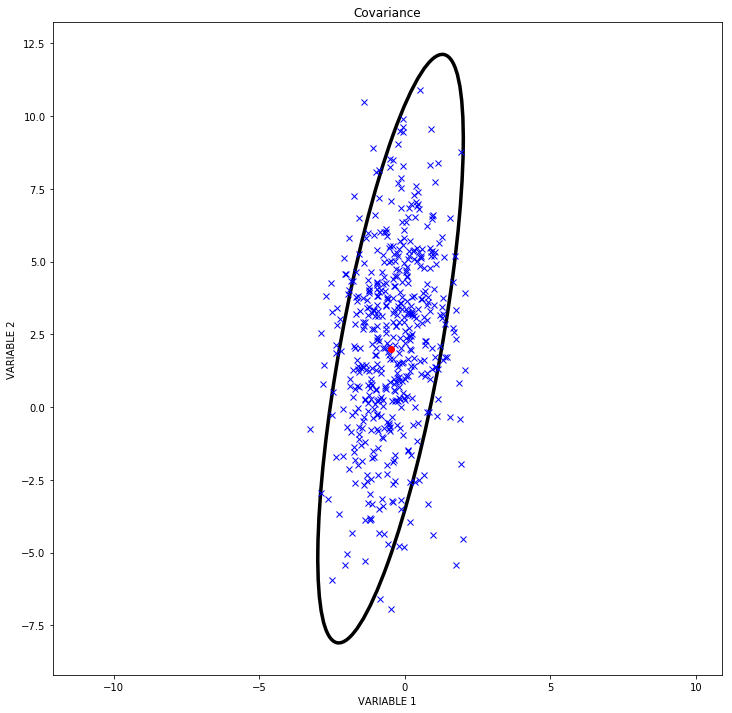

In [33]:
plt.title('Covariance')
plt.axis('equal')
plt.xlabel('VARIABLE 1')
plt.ylabel('VARIABLE 2')

# TODO: fiddle around with covariance params
plt.plot(samples[:500, 0], samples[:500, 1], 'bx')
plot_ellipse(mean, np.array([[2, 1.5], [1.5, 10]]))

[Solution](./2D-Gaussian-Solution.ipynb)